# 기초데이터과학 (01분반)

## 09-2. 데이터 시각화 2 (seaborn 활용)

### Acknowledgement

#### 이 자료는 다음 서적의 내용을 바탕으로 작성되었음
- Do it! 데이터 분석을 위한 판다스 입문. 전면 개정판. 이지스 퍼블리싱
- 파이썬 라이브러리를 활용한 데이터 분석. 한빛미디어
- Seaborn을 사용한 데이터 분포 시각화 (데이터 사이언스 스쿨: datascienceschool.net) https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html


### seaborn 라이브러리

#### matplotlib 기반을 둔 통계 그래프에 특화된 시각화 라이브러리
- 짧은 코드로도 복잡한 그래프를 그릴 수 있음
- numpy, pandas 등과 같이 데이터 분석에 자주 쓰는 라이브러리와 호환되며 손쉽게 데이터를 시각화할 수 있음
  - https://seaborn.pydata.org/


#### **일변량 그래프 그리기**
- 변수 하나를 나타낸 그래프


##### tips 데이터셋
- 레스토랑에 방문한 손님이 지불한 팁과 청구서 전체 금액, 성별, 흡연여부, 요일, 시간, 일행 수 등에 대한 정보를 가지고 있는 데이터 셋

In [1]:
import seaborn as sns

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [2]:
# set_context 함수를 이용하여 결과 그래프의 글자 크기, 선 굵기, 축 눈금 크기 등 그래프의 전반적인 크기를 설정할 수 있음
# paper, notebook, talk, poster 4가지 설정 가능. 기본값은 notebook

sns.set_context("talk") 

##### 1. 히스토그램  그리기

- sns.histplot()

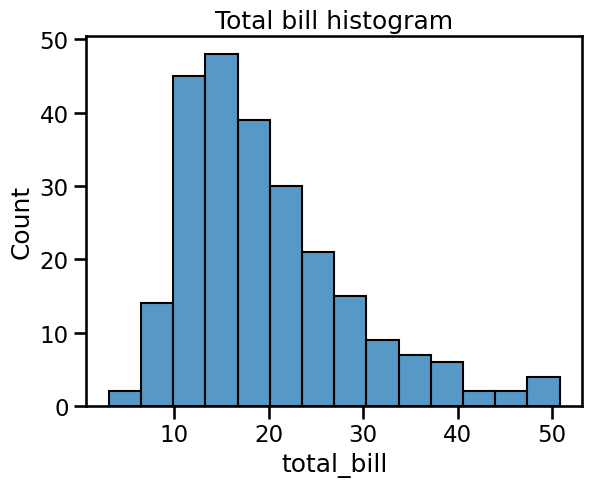

In [3]:
import matplotlib.pyplot as plt

sns.histplot(data=tips, x='total_bill') \
# data: 그래프 그리기에 사용할 데이터를 담고 있는 데이터프레임 객체
# x: 그래프 그리기에 사용할 컬럼(변수)

plt.title('Total bill histogram')
plt.show()


##### 2. 밀도 분포 그래프 그리기
- sns.kdeplot()


- 커널 밀도 추정 (kernel density estimation) 그래프라고도 함


- density estimation (밀도 추정): (관측된) 데이터들의 분포로부터 원래 변수의 (확률) 분포 특성을 추정하고자 하는 것 
  - 1. 관측된 데이터 각각마다 해당 데이터 값을 중심으로 하는 커널 함수를 생성한다.
  - 2. 이렇게 만들어진 커널 함수들을 모두 더한 후 전체 데이터 개수로 나눈다.

https://en.wikipedia.org/wiki/File:Comparison_of_1D_histogram_and_KDE.png




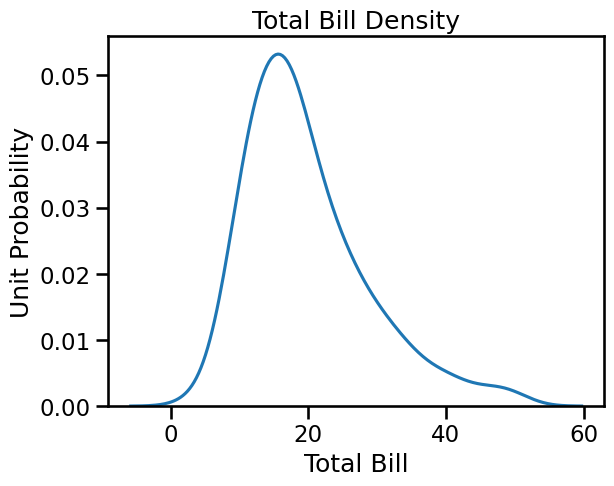

In [4]:
sns.kdeplot(data=tips, x='total_bill')

plt.title('Total Bill Density')
plt.xlabel('Total Bill')
plt.ylabel('Unit Probability')

plt.show()

##### 3. 러그 그래프 그리기
- sns.rugplot()
  - 러그 그래프는 변수 분포를 1차원으로 나타냄
  - 일반적으로 다른 유형의 그래프에 추가 정보를 제공할 때 사용

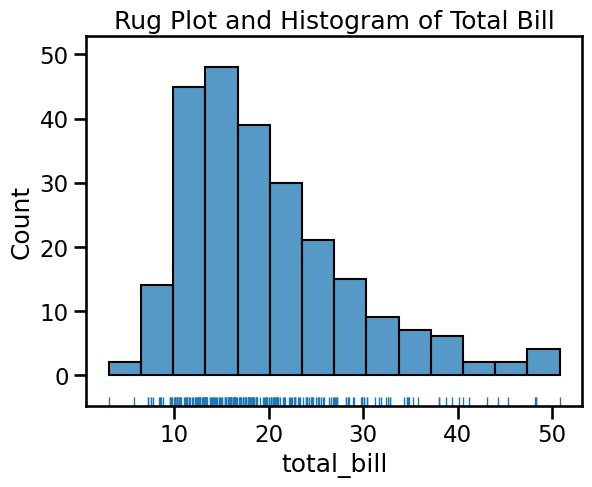

In [5]:
# 히스토그램과 같이 러그 그래프 그리는 예제

sns.rugplot(data=tips, x='total_bill')
sns.histplot(data=tips, x='total_bill')

plt.title('Rug Plot and Histogram of Total Bill')

plt.show()

##### 4. 분포 그래프 그리기
- sns.displot()
  - 여러 개의 일변량 그래프를 하나의 그래프로 표현하기
  

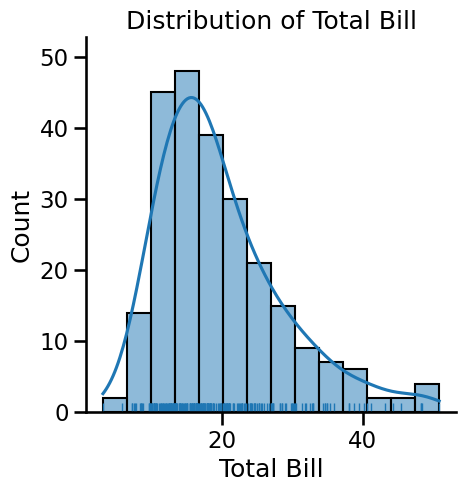

In [6]:
sns.displot(data=tips, x='total_bill', kde=True, rug=True)

plt.xlabel('Total Bill')
plt.ylabel('Count')
plt.title('Distribution of Total Bill')

plt.show()

##### 5. 막대 그래프 그리기
- sns.countplot()
  

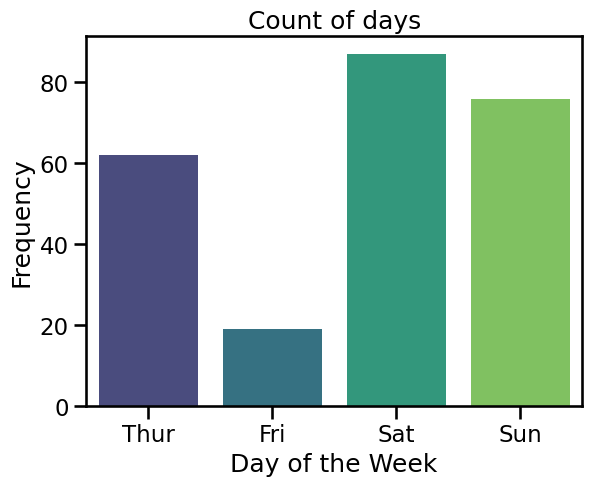

In [13]:
sns.countplot(data=tips, x='day', palette='viridis', hue='day', legend=False)
# x: 그래프 그리기에 사용할 컬럼
# palette: 그래프 색상 설정 (예: viridis, pastel, husl, Set2, flare) 
# https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

plt.title('Count of days')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')

plt.show()

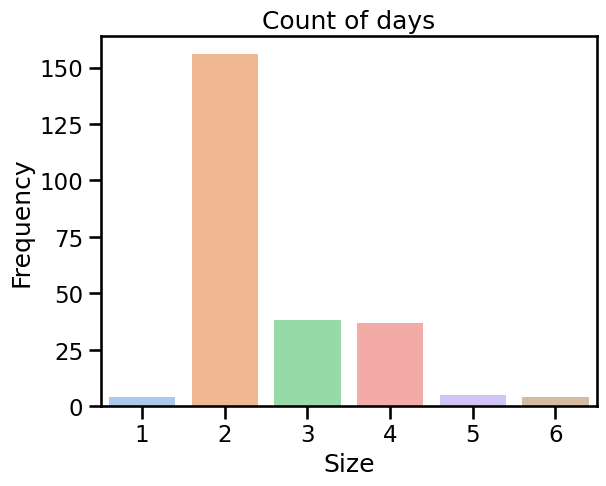

In [14]:
sns.countplot(data=tips, x='size', palette='pastel', hue='size', legend=False)
# x: 그래프 그리기에 사용할 컬럼
# palette: 그래프 색상 설정 (예: viridis, pastel, husl, Set2, flare) 
# https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

plt.title('Count of days')
plt.xlabel('Size')
plt.ylabel('Frequency')

plt.show()

#### **이변량 그래프 그리기**
- 2개 변수를 나타내는 그래프

##### 1. 산점도 그래프 그리기 1
- sns.scatterplot()


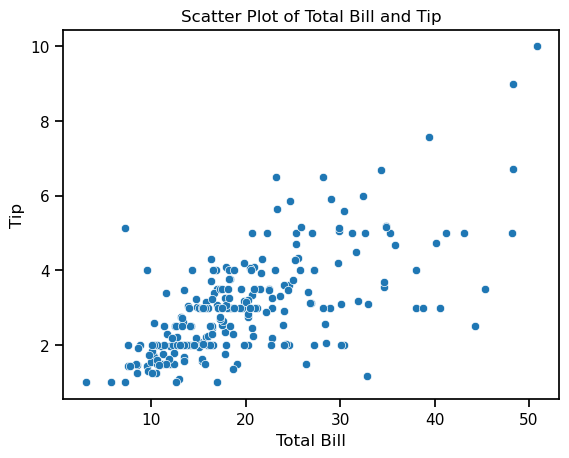

In [15]:
# set_context 함수를 이용하여 결과 그래프의 글자 크기, 선 굵기, 축 눈금 크기 등 그래프의 전반적인 크기를 설정할 수 있음
# paper, notebook, talk, poster 4가지 설정 가능. 기본값은 notebook
sns.set_context("notebook")

# total_bill 컬럼과 tip 컬럼 데이터로 산점도 그래프 그리기
sns.scatterplot(data=tips, x='total_bill', y='tip')

plt.title('Scatter Plot of Total Bill and Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.show()

##### 2. 산점도 그래프 그리기 2
- sns.regplot()
  - 회귀선(regression line)도 같이 그림

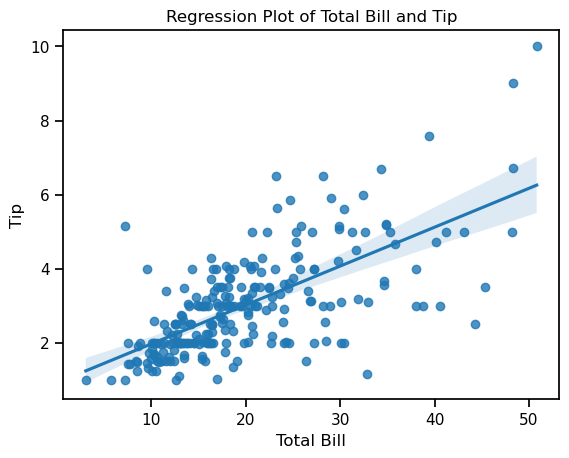

In [16]:
# total_bill 컬럼과 tip 컬럼 데이터로 산점도 그래프 그리기
sns.regplot(data=tips, x='total_bill', y='tip')

plt.title('Regression Plot of Total Bill and Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.show()

##### 3. 조인트 그래프 그리기
- sns.jointplot()
  - 산점도 그래프의 x축과 y축에 일변량 그래프를 함께 그림

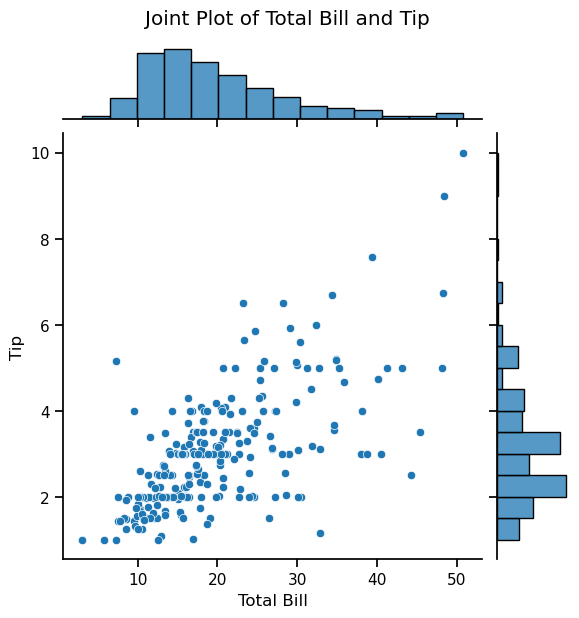

In [17]:
joint = sns.jointplot(data=tips, x='total_bill', y='tip')
# jointplot 함수는 JointGrid 객체 반환

# JointGrid의 set_axis_labels() 함수를 이용하면 산점도 그래프의 x, y축 레이블을 설정할 수 있음
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')

plt.suptitle('Joint Plot of Total Bill and Tip', y=1.03)

plt.show()

##### 4. 육각 그래프 그리기
- sns.jointplot() 함수
  - kind 매개변수: "hex"
  
- 산점도 그래프에 표시할 데이터가 너무 많아 그래프가 복잡해질 경우 인접한 점을 구간별로 묶어서 표시하는 육각 그래프(hexbin plot)를 이용할 수 있음
  - 히스토그램이 한 변수의 값을 구간별로 묶어 막대로 표현하는 것처럼 육각 그래프는 두 변수의 값을 나타내는 점을 구간별로 묶어 표현

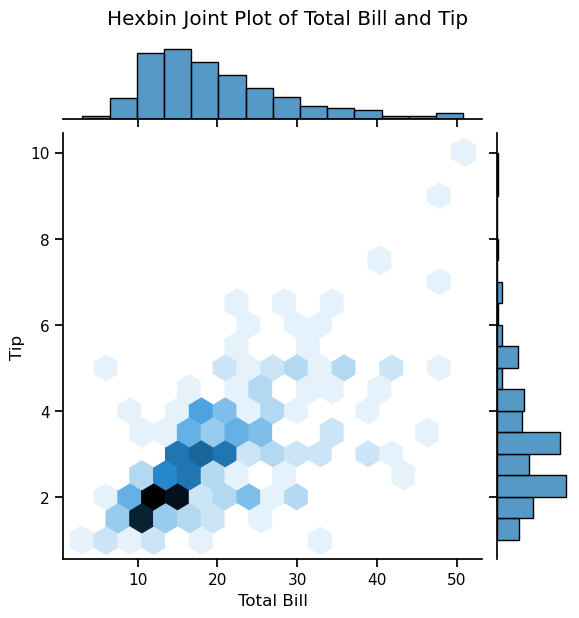

In [18]:
hexbin = sns.jointplot(data=tips, x="total_bill", y="tip", kind="hex")

hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')

plt.suptitle('Hexbin Joint Plot of Total Bill and Tip', y=1.03)

plt.show()

##### 5. 2차원 밀도 분포 그래프 그리기
- sns.kdeplot()
  - 2개의 변수를 사용

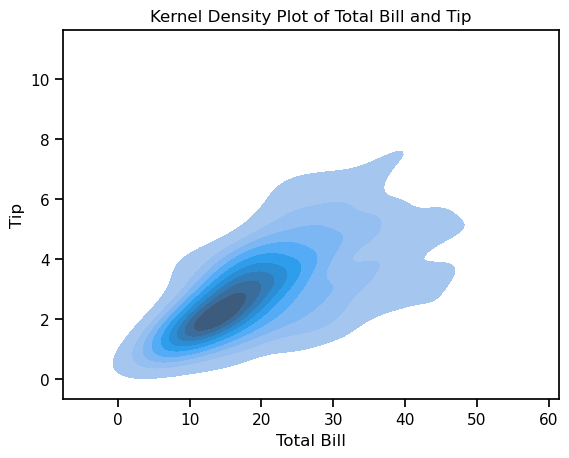

In [19]:
sns.kdeplot(data=tips, x="total_bill", y="tip", fill=True)
# x, y 두 개의 매개변수 사용
# fill 매개변수: True (음영 효과)

plt.title('Kernel Density Plot of Total Bill and Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.show()

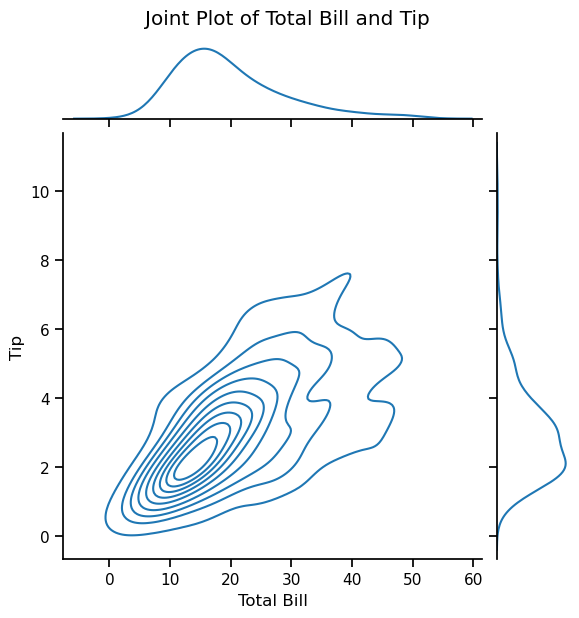

In [20]:
# 조인트 그래프로 표현
kde2d = sns.jointplot(data=tips, x="total_bill", y="tip", kind="kde")

kde2d.set_axis_labels(xlabel='Total Bill', ylabel='Tip')

plt.suptitle('Joint Plot of Total Bill and Tip', y=1.03)

plt.show()

##### 6. 막대 그래프 그리기
- sns.barplot()
  - 기본값으로 지정한 변수의 산술 평균을 계산
  - 다른 계산 함수를 사용할 경우 estimator 매개변수를 이용
  

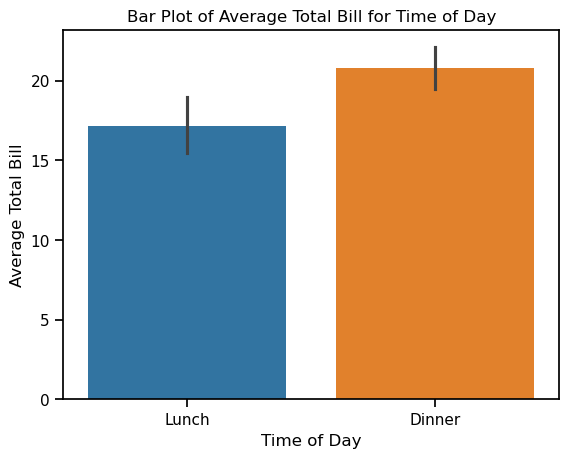

In [29]:
import numpy as np

sns.barplot(data=tips, x="time", y="total_bill", estimator=np.mean, hue='time')
# hue 매개변수 값을 지정하지 않으면 동일한 색상으로 표현
#sns.barplot(data=tips, x="time", y="total_bill", estimator=np.mean)

plt.title('Bar Plot of Average Total Bill for Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Total Bill')

plt.show()

##### 7. 박스 그래프 그리기
- sns.boxplot()
  - 최소값, 1사분위수, 중앙값, 3사분위수, 최대값, 이상값 등 다양한 통계량을 한 번에 표현

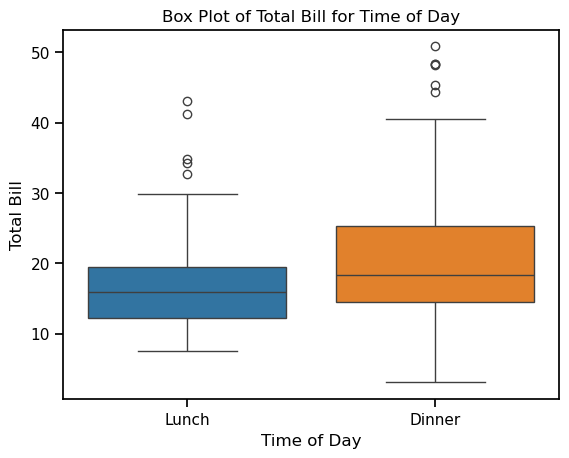

In [26]:
sns.boxplot(data=tips, x='time', y='total_bill', hue='time')

plt.title('Box Plot of Total Bill for Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Bill')

plt.show()

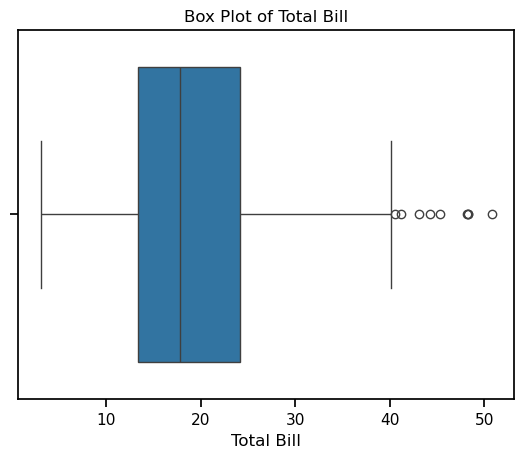

In [23]:
sns.boxplot(data=tips, x='total_bill')
# 매개변수 y는 생략 가능. 하나의 상자만 그래프로 표시. 단, 이때 매개변수 x는 반드시 숫자형 변수를 지정

plt.title('Box Plot of Total Bill')
plt.xlabel('Total Bill')

plt.show()

##### 8. 바이올린 그래프 그리기
- sns.violinplot()
  - 박스 그래프에 커널 밀도 추정을 함께 표현한 그래프

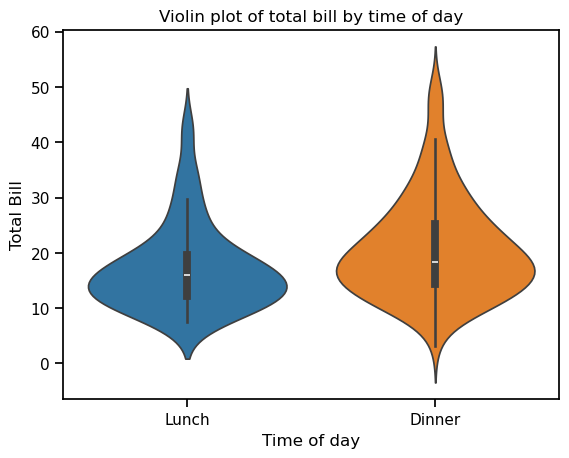

In [25]:
sns.violinplot(data=tips, x='time', y='total_bill', hue='time')

plt.title('Violin plot of total bill by time of day')

plt.xlabel('Time of day')
plt.ylabel('Total Bill')

plt.show()

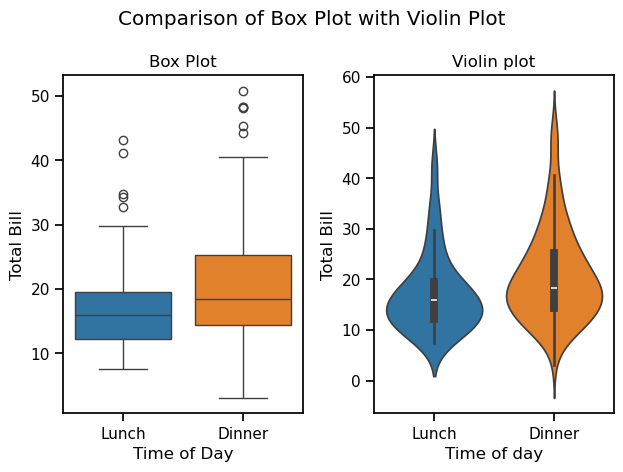

In [31]:
# subplots() 함수 이용하여 다중 그래프 그리기
# box plot과 violin plot 비교

box_violin, (ax1, ax2) = plt.subplots(nrows=1, ncols=2) # 행 1개, 열 2개를 포함하는 다중 그래프
# 반환값이 2개인데, 첫번째는 전체 그래프를 지칭, 두번째는 각 서브 그래프를 지칭 
# 행 1개, 열 2개이므로 총 2개의 서브 그래프가 있으므로 이를 각각 ax1, ax2로 할당

# 서브 그래프로 사용할 box plot, violin plot 생성
sns.boxplot(data=tips, x='time', y='total_bill', ax=ax1, hue='time')
sns.violinplot(data=tips, x='time', y='total_bill', ax=ax2, hue='time')

# 첫번째 서브 그래프
ax1.set_title('Box Plot')
ax1.set_xlabel('Time of Day')
ax1.set_ylabel('Total Bill')

# 두번째 서브 그래프
ax2.set_title('Violin plot')
ax2.set_xlabel('Time of day')
ax2.set_ylabel('Total Bill')

# 전체 다중 그래프의 제목
box_violin.suptitle("Comparison of Box Plot with Violin Plot")

box_violin.set_tight_layout(True)

plt.show()

##### 9. 관계 그래프 그리기 1

- sns.pairplot()
  - 여러 숫자 데이터 변수가 있을 때 변수 쌍별 관계를 나타냄
  - 숫자형 변수 사이의 산점도 그래프와 각 숫자형 변수의 히스토그램을 한 번에 표시
  - 중복된 정보를 표현한다는 단점이 있음

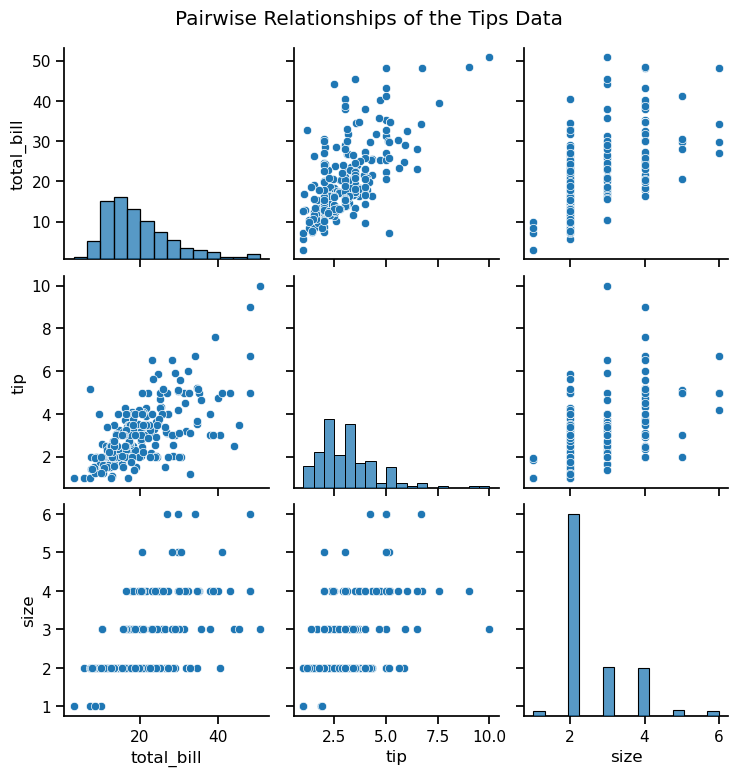

In [32]:
sns.pairplot(data=tips)

plt.suptitle('Pairwise Relationships of the Tips Data', y=1.03)

plt.show()

##### 10. 관계 그래프 그리기 2
- sns.PairGrid()
  - 대각선을 기준으로 위, 아래 또는 대각선을 선택하여 원하는 관계 그래프를 그릴 수 있음
  - map_upper(), map_lower(), map_diag() 함수에 원하는 시각화 함수를 인수로 전달

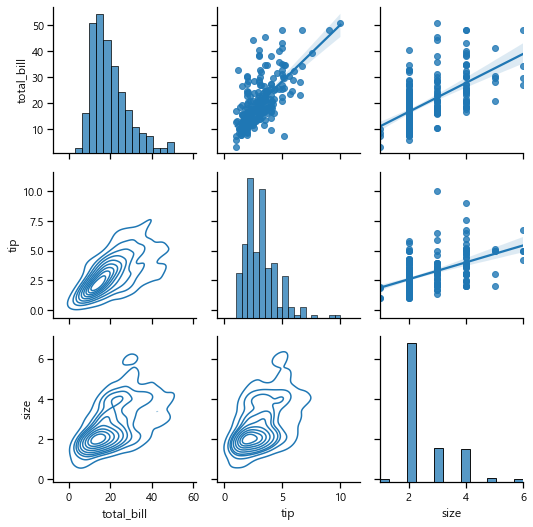

In [77]:
pair_grid = sns.PairGrid(tips, diag_sharey=False)

pair_grid = pair_grid.map_upper(sns.regplot) # 대각선 위에 위치할 그래프
pair_grid = pair_grid.map_lower(sns.kdeplot) # 대각선 아래에 위치할 그래프
pair_grid = pair_grid.map_diag(sns.histplot) # 대각선 상에 위치할 그래프

plt.show()

##### 11. heatmap 그리기
- sns.heatmap()
  - 색상으로 표현할 수 있는 다양한 정보를 2차원의 시각적인 그래프로 표시
  - 데이터 값의 크기를 색상으로 표현할 수 있음


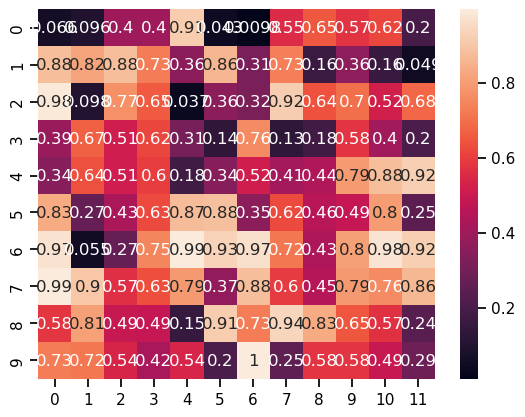

In [33]:
# 랜덤 값으로 heatmap 그리기

data = np.random.rand(10, 12) # 0~1 사이 랜덤 값을 갖는 10행 12열 2차원 numpy 배열 생성

sns.heatmap(data, annot=True) # annot 매개변수 값이 True이면 각 셀에 데이터 값을 기록
plt.show()

In [34]:
# 월별 flight 승객수 데이터로 heatmap 그리기

flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [35]:
# 각 년도의 월별 승객수를 heatmap으로 표현하기 위해 Dataframe의 형태를 변경

piv = flights.pivot(index='month', columns='year', values='passengers')
piv.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


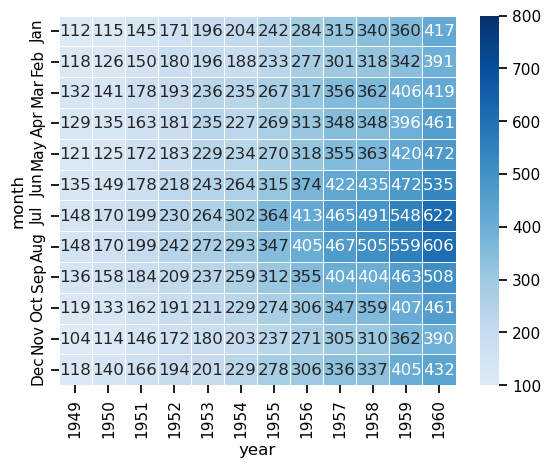

In [36]:
sns.heatmap(piv, # 데이터
           vmin=100, # 최소값
           vmax=800, # 최대값
           cbar=True, # colorbar의 유무
           center=400, # 중앙값
           linewidth=0.5, # cell 사이 선 폭
           annot=True, # 각 cell의 값 표시 여부
            fmt='d', # 값의 데이터 타입
            cmap='Blues' # 색상
           )
plt.show()

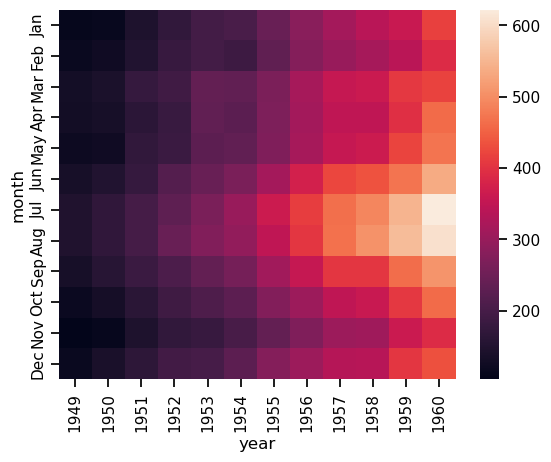

In [37]:
sns.heatmap(piv, # 데이터
           cbar=True, # colorbar의 유무
           )
plt.show()

#### 더 많은 변수를 그래프에 표현하기

- hue 매개변수: 색상으로 구분하여 변수를 표현

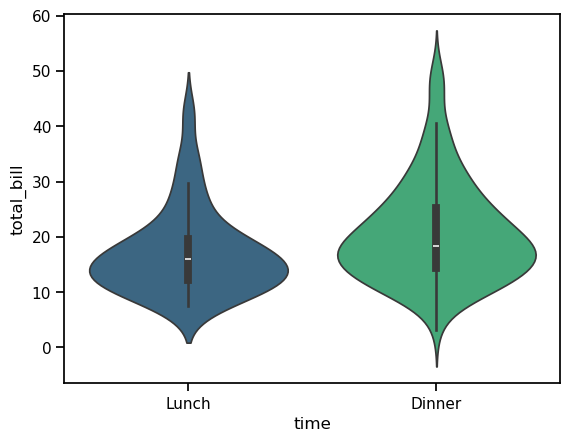

In [39]:
sns.violinplot(data=tips,
               x="time",
               y="total_bill",
               palette="viridis",
               hue='time')

plt.show()

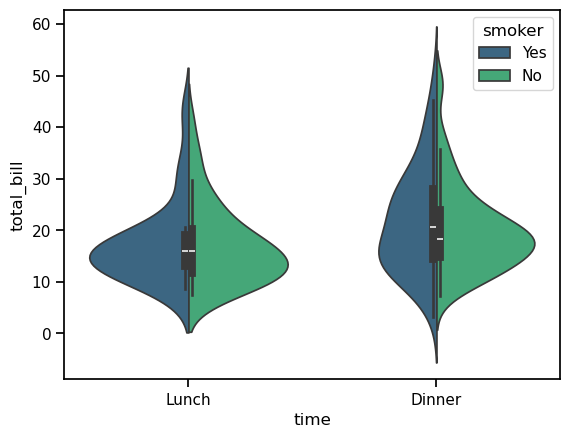

In [40]:
sns.violinplot(data=tips,
               x="time",
               y="total_bill",
               hue="smoker",
               split=True,
               palette="viridis")
# split 매개변수 값을 True로 하면 하나의 바이올린 그래프를 나누어서 서로 다른 데이터 분포를 표현
# 여기서는 smoker Yes/No를 구분

plt.show()

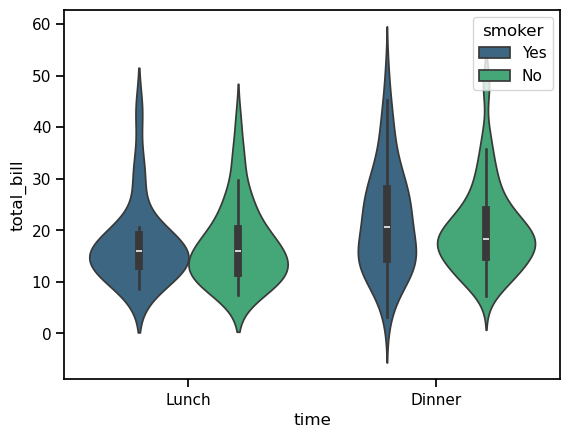

In [41]:
sns.violinplot(data=tips,
               x="time",
               y="total_bill",
               hue="smoker",
               split=False,
               palette="viridis")
# split 매개변수 값을 False로 하면 서로 다른 데이터 분포를 별도의 바이올린 그래프로 표현
# 여기서는 smoker Yes/No를 구분

plt.show()

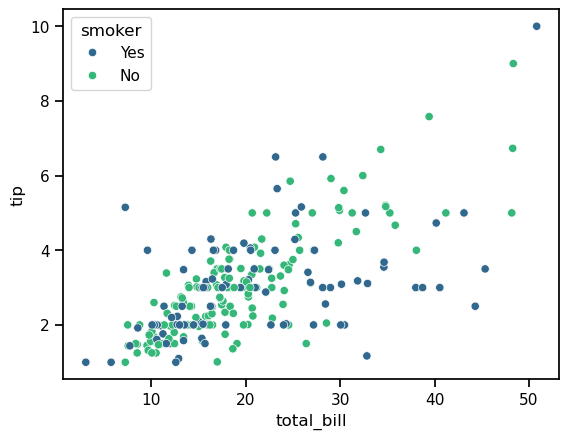

In [42]:
sns.scatterplot(data=tips,
                     x="total_bill",
                     y="tip",
                     hue="smoker",
                     palette="viridis")

plt.show()

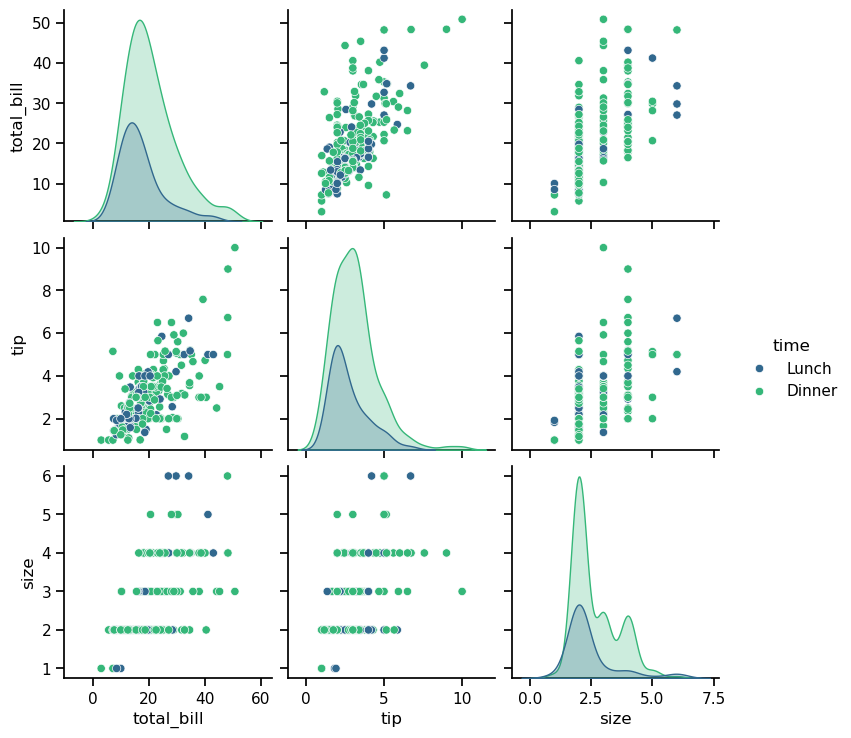

In [43]:
sns.pairplot(tips, hue="time", palette="viridis")

plt.show()

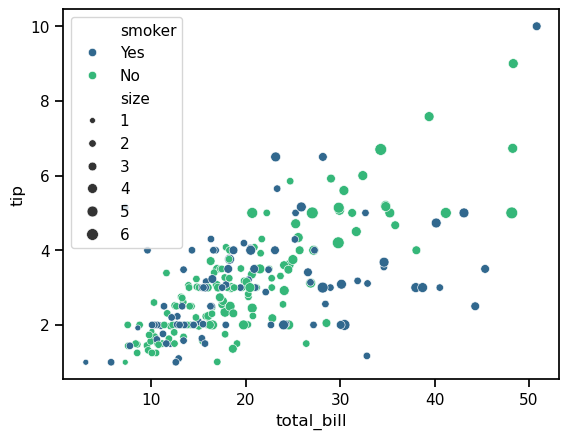

In [44]:
sns.scatterplot(data=tips,
                     x="total_bill",
                     y="tip",
                     hue="smoker",
                     size="size",
                     palette="viridis")
# size 매개변수: 점의 크기를 표현할 변수

plt.show()

#### 그래프 나눠 그리기

- FacetGrid 객체 이용

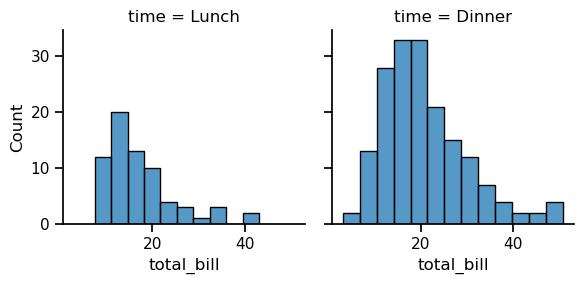

In [45]:
facet = sns.FacetGrid(tips, col='time')

facet.map(sns.histplot, 'total_bill')
plt.show()

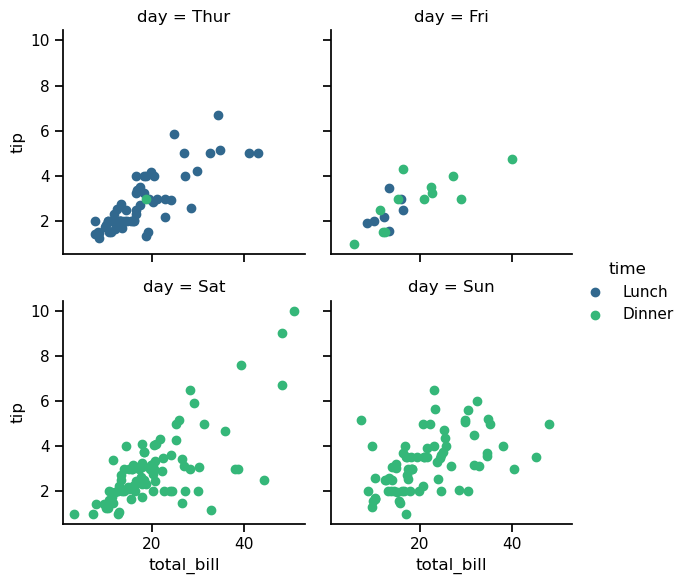

In [47]:
facet = sns.FacetGrid(tips, 
                      col='day', 
                      col_wrap=2, 
                      hue='time', 
                      palette="viridis")
# col 매개변수: 구분하여 그래프를 그릴 변수
# col_wrap 매개변수: 한 열에 표시할 그래프 수
# hue 매개변수: 색상으로 구분할 변수

facet.map(plt.scatter, 'total_bill', 'tip')
# total_bill과 tip 변수에 대해서 산점도 그래프를 그림

facet.add_legend()

plt.show()